# Data Loading

In the first step, we load the required data for our analysis. We read the electric vehicle population data and the census median income data from their respective CSV files.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

electric_vehicle_population = pd.read_csv("EV-data.csv")
census_median_income = pd.read_csv("census-data.csv")

# Clean Vehicle Data

To simplify the column names for easier use in python, we will rename the columns to lowercase and replace spaces with underscores. We will also remove the four rows where the "model" column contains NA values. Additionally, we will create a new column, "vehicle," by combining the "year," "make," and "model" fields.

In [14]:
electric_vehicle_population.columns = electric_vehicle_population.columns.str.lower().str.replace(' ', '_')

electric_vehicle_population_clean = electric_vehicle_population.dropna(subset=['model'])

electric_vehicle_population_clean['vehicle'] = electric_vehicle_population_clean['model_year'].astype(str) + ' ' + electric_vehicle_population_clean['make'] + ' ' + electric_vehicle_population_clean['model']
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].fillna(0).astype(int).astype(str)
electric_vehicle_population_clean.head()

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,vehicle
0,1N4AZ0CP8D,King,Shoreline,WA,98177,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,32.0,125450447,POINT (-122.36498 47.72238),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10,2013 NISSAN LEAF
1,5YJSA1E45K,King,Seattle,WA,98112,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,101662900,POINT (-122.30207 47.64085),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,2019 TESLA MODEL S
2,WVGUNPE28M,Kitsap,Olalla,WA,98359,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,272118717,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10,2021 VOLKSWAGEN ID.4
3,JTDKARFP6H,Thurston,Olympia,WA,98501,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,22.0,349372929,POINT (-122.89166 47.03956),PUGET SOUND ENERGY INC,5.306701e+10,2017 TOYOTA PRIUS PRIME
4,1FADP5CU9G,Thurston,Olympia,WA,98506,2016,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,22.0,171625653,POINT (-122.87741 47.05997),PUGET SOUND ENERGY INC,5.306701e+10,2016 FORD C-MAX


# Clean Income Data
We are interested in the column `S1903_C03_001E`. To focus on zip codes and income data, we’ll clean the table by extracting zip codes, which are strings starting with “ZCTA5,” and removing the prefix to isolate the zip codes. This will leave us with a simplified table containing two columns: `zip_code` and `median_household_income`. Rows with missing income data are marked with “-”, so we’ll filter those out.

In [3]:
census_median_income.head()

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,8600000US98001,ZCTA5 98001,11648,558,7681,506,716,198,183,100,...,7519,135112,33727,58490,13059,47045,17376,69176,3830,NaN
2,8600000US98002,ZCTA5 98002,13162,583,8812,611,1071,289,299,140,...,4679,70682,15215,39757,7832,33634,2709,81544,27741,NaN
3,8600000US98003,ZCTA5 98003,18515,823,10454,663,2887,553,114,68,...,6290,81797,15871,37839,9764,29226,3739,95114,33065,NaN
4,8600000US98004,ZCTA5 98004,17460,660,10494,616,372,187,26,39,...,11161,131719,34582,118875,15335,117807,17404,119841,48138,NaN


In [10]:
census_median_income_clean = census_median_income.iloc[1:].copy()
census_median_income_clean = census_median_income_clean[['NAME', 'S1903_C03_001E']]
census_median_income_clean = census_median_income_clean.rename(columns={'S1903_C03_001E': 'median_household_income'})
census_median_income_clean = census_median_income_clean.dropna(subset=['median_household_income'])

# Extract zip codes and clean data
census_median_income_clean['zip_code'] = census_median_income_clean['NAME'].str.split(' ').str[-1]
census_median_income_clean = census_median_income_clean[['zip_code', 'median_household_income']]

# Filter out rows with missing income data
census_median_income_clean = census_median_income_clean[census_median_income_clean['median_household_income'] != '-']

census_median_income_clean.head()

,zip_code,median_household_income
1,98001,88962
2,98002,59097
3,98003,59560
4,98004,142173
5,98005,135225


## Census Data

In the next step, we combine the EV and census datasets to investigate if there are differences between high and low income regions and how many EVs are sold there.

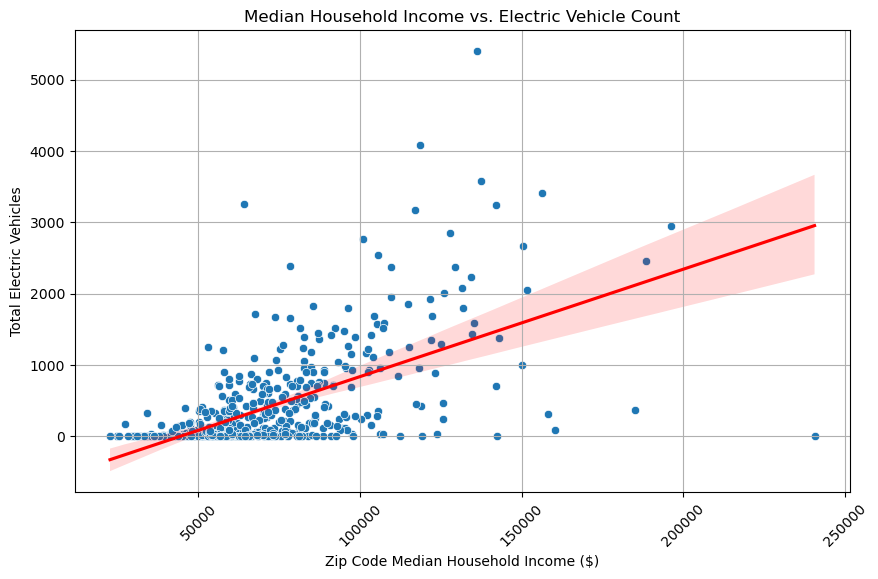

In [11]:
electric_vehicle_population_clean['postal_code'] = electric_vehicle_population_clean['postal_code'].astype(str)
census_median_income_clean['zip_code'] = census_median_income_clean['zip_code'].astype(str)

# Merge the dataframes on zip code
electric_vehicle_byzip = pd.merge(electric_vehicle_population_clean, census_median_income_clean, left_on='postal_code', right_on='zip_code')

# Group by postal code and median household income, and count the number of vehicles per zip code
electric_vehicle_byzip_grouped = electric_vehicle_byzip.groupby(['postal_code', 'median_household_income']).size().reset_index(name='vehicle_n')

# Convert median household income to numeric
electric_vehicle_byzip_grouped['median_household_income_num'] = pd.to_numeric(electric_vehicle_byzip_grouped['median_household_income'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_household_income_num', y='vehicle_n', data=electric_vehicle_byzip_grouped)
sns.regplot(x='median_household_income_num', y='vehicle_n', data=electric_vehicle_byzip_grouped, scatter=False, color='red')
plt.title('Median Household Income vs. Electric Vehicle Count')
plt.xlabel('Zip Code Median Household Income ($)')
plt.ylabel('Total Electric Vehicles')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
slope_income, intercept_income, r_value_income, p_value_income, std_err_income = stats.linregress(electric_vehicle_byzip_grouped['median_household_income_num'], electric_vehicle_byzip_grouped['vehicle_n'])

print("Regression statistics for Median Household Income vs Electric Vehicle Count:")
print(f"Slope: {slope_income}")
print(f"Intercept: {intercept_income}")
print(f"R-squared value: {r_value_income**2}")
print(f"P-value: {p_value_income}")
print(f"Standard error: {std_err_income}")

Regression statistics for Median Household Income vs Electric Vehicle Count:
Slope: 0.015058954621691111
Intercept: -667.227612000883
R-squared value: 0.3602123092252227
P-value: 2.1543376133342405e-52
Standard error: 0.0008800995888975279


### Regression Analysis Summary


These values indicate a positive relationship between median household income and the number of electric vehicles. The R-squared value suggests that approximately 36% of the variability in electric vehicle count can be explained by median household income. The low p-value indicates that the relationship is statistically significant.

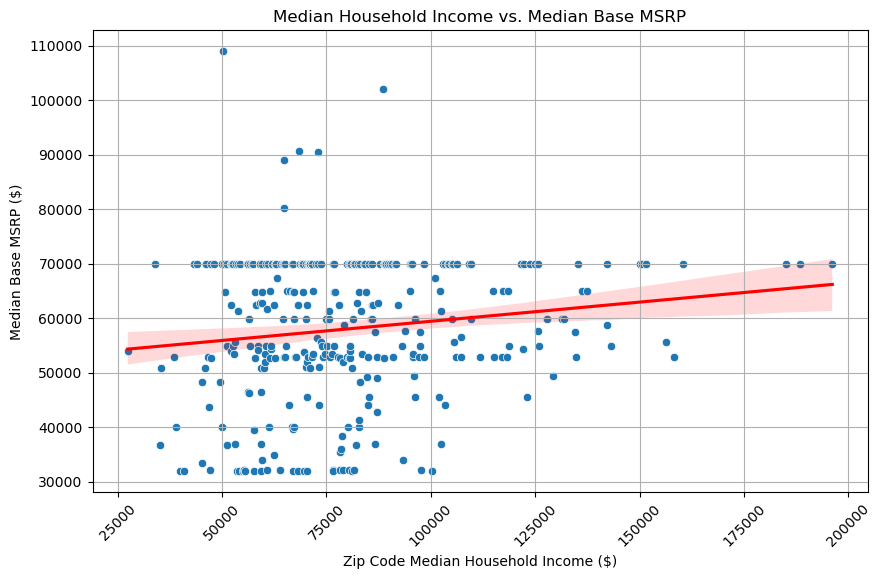

In [15]:
electric_vehicle_byzip_without_na_msrp = electric_vehicle_byzip.replace(0, np.nan).dropna(subset=['base_msrp'])
# electric_vehicle_byzip['base_msrp'].isna().sum()

vehicle_median_msrp_per_income = electric_vehicle_byzip_without_na_msrp.groupby('median_household_income').agg(
    median_base_msrp=('base_msrp', 'median')
).reset_index()

# Convert median household income to numeric
vehicle_median_msrp_per_income['median_household_income_num'] = pd.to_numeric(vehicle_median_msrp_per_income['median_household_income'])

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='median_household_income_num', y='median_base_msrp', data=vehicle_median_msrp_per_income)
sns.regplot(x='median_household_income_num', y='median_base_msrp', data=vehicle_median_msrp_per_income, scatter=False, color='red')
plt.title('Median Household Income vs. Median Base MSRP')
plt.xlabel('Zip Code Median Household Income ($)')
plt.ylabel('Median Base MSRP ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [21]:
models_with_msrp_range = electric_vehicle_byzip[(electric_vehicle_byzip['base_msrp'] >= 65000) & (electric_vehicle_byzip['base_msrp'] <= 75000)]['model']

print(models_with_msrp_range.unique())

['MODEL S']


In [22]:
slope_income, intercept_income, r_value_income, p_value_income, std_err_income = stats.linregress(vehicle_median_msrp_per_income['median_household_income_num'], vehicle_median_msrp_per_income['median_base_msrp'])

print("Regression statistics for Median Household Income vs. Median Base MSRP:")
print(f"Slope: {slope_income}")
print(f"Intercept: {intercept_income}")
print(f"R-squared value: {r_value_income**2}")
print(f"P-value: {p_value_income}")
print(f"Standard error: {std_err_income}")

Regression statistics for Median Household Income vs. Median Base MSRP:
Slope: 0.07035184611243897
Intercept: 52411.7096543816
R-squared value: 0.02070646698538579
P-value: 0.008851297883571817
Standard error: 0.02671419043650408


### Regression Analysis Summary


These values indicate a positive relationship between median household income and the median base MSRP of electric vehicles. However, the R-squared value suggests that only about 2% of the variability in the median base MSRP can be explained by median household income. The low p-value indicates that the relationship is statistically significant.

Even though there is a trend towards more expensive cars with increasing household income, there is a noticeable concentration of vehicles around the $70,000 mark. This suggests that the Tesla Model S, which is priced around $70,000, is popular across various income regions, regardless of the median household income.